In [1]:
import numpy as np
from statistics import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
reductions = np.linspace(0.0, 1.0, 101)

In [4]:
cs = [Classifier(r, 3.0) for r in reductions]

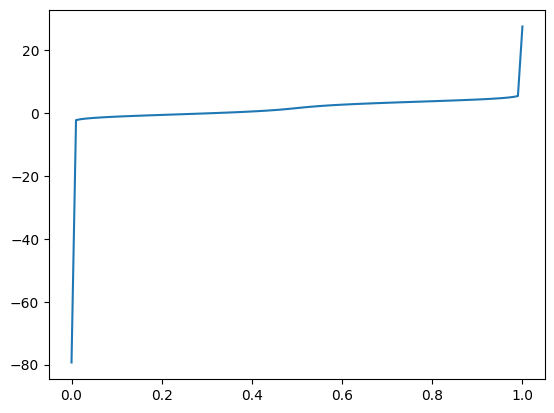

In [5]:
plt.plot(reductions, [c.threshold for c in cs])

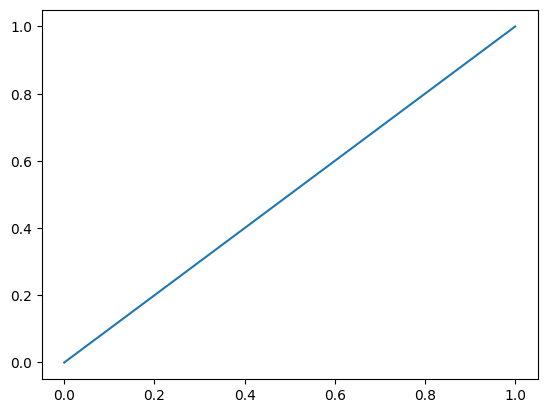

In [7]:
plt.plot(reductions, [c.scores(c.threshold) for c in cs])

In [8]:
cs[0].reduction

0.0

In [9]:
cs[0].error_matrix

array([[0., 0.],
       [1., 1.]])

In [10]:
a = cs[0](np.array([1000, 50]))

In [11]:
get_passed(a)

array([1000.,   50.])

In [13]:
get_rejected(a)

array([0., 0.])

In [14]:
cs[-1].reduction

1.0

In [15]:
cs[1].error_matrix

array([[1.01010094e-02, 5.11544146e-08],
       [9.89898991e-01, 9.99999949e-01]])

In [16]:
b = cs[-1](np.array([1000, 50]))

In [18]:
get_passed(b)

array([0., 0.])

In [19]:
get_rejected(b)

array([1000.,   50.])

In [20]:
mats = np.stack([c.error_matrix for c in cs])

In [21]:
mats.shape

(101, 2, 2)

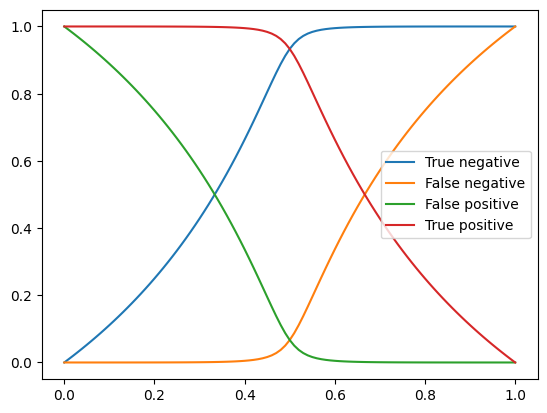

In [23]:
plt.plot(reductions, mats[:,0,0], label="True negative")
plt.plot(reductions, mats[:,0,1], label="False negative")
plt.plot(reductions, mats[:,1,0], label="False positive")
plt.plot(reductions, mats[:,1,1], label="True positive")
plt.legend()